In [1]:
from src.houses import *
from src.agents import *
from src.bidding import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # to remove 1e6 base from the x axis on plots

c:\Daniel's Things\Coding projects\eco_projects\schelling_income_model\src\houses.py:47: SyntaxWarning: invalid escape sequence '\l'
  """We define the agent's max WTP for rent in neighborhood $j$ as


In [2]:
n = 1_000_000
agents = generate_agents(n)
size = sys.getsizeof(agents)
print(f"The agents array takes up {size} bytes of memory, which is {size/(1024**3):.6f} GB of memory")
print(agents)

The agents array takes up 31000112 bytes of memory, which is 0.028871 GB of memory
[(     0,  52665.22661123, 1, 70, False, -1, 0., 0.7166534 )
 (     1, 264082.29932301, 5, 23, False, -1, 0., 0.6037825 )
 (     2, 169283.89042527, 4, 96, False, -1, 0., 0.7846694 ) ...
 (999997, 268466.49731545, 5, 18, False, -1, 0., 0.6687577 )
 (999998, 391505.75235942, 6, 93, False, -1, 0., 0.7506845 )
 (999999,  49695.21422537, 1, 31, False, -1, 0., 0.68136317)]


In [3]:
freq, total = get_freq_and_total(agents)
proportions = get_proportion(freq, total)
agents = check_happiness(agents, proportions)
print(agents)

[(     0,  52665.22661123, 1, 70,  True, -1, 0., 0.7166534 )
 (     1, 264082.29932301, 5, 23,  True, -1, 0., 0.6037825 )
 (     2, 169283.89042527, 4, 96,  True, -1, 0., 0.7846694 ) ...
 (999997, 268466.49731545, 5, 18, False, -1, 0., 0.6687577 )
 (999998, 391505.75235942, 6, 93, False, -1, 0., 0.7506845 )
 (999999,  49695.21422537, 1, 31,  True, -1, 0., 0.68136317)]


In [4]:
utility = get_utilities(agents, proportions)
print(utility)

[[0.15598588 0.7169255  0.81323403 ... 0.         0.         0.4814623 ]
 [0.         0.         0.61499166 ... 0.         0.31362686 0.        ]
 [0.         0.         0.3895162  ... 0.         0.21105611 0.        ]
 ...
 [0.         0.51167405 0.8099842  ... 0.44974527 0.6969519  0.599334  ]
 [0.         0.         0.09470011 ... 0.         0.         0.        ]
 [0.48661065 0.813014   0.8758832  ... 0.3171232  0.28185558 0.66461706]]


In [5]:
bids, neighborhoods_chosen = place_bid(agents, utility)
print(bids)

[ 15799.76798337  79224.8897969   50785.36712758 ...  80540.14919463
 117451.92570783  14908.76426761]


In [6]:
houses = initialize_houses(agents)
print(houses)

[(     0, -1, 10, 100000.) (     1, -1, 79, 100000.)
 (     2, -1, 52, 100000.) ... (999997, -1, 11, 100000.)
 (999998, -1, 53, 100000.) (999999, -1, 16, 100000.)]


In [7]:
agent_house_mapping(agents, houses)
priced_out_mask = check_priced_out(agents, houses, proportions)
evict_priced_out(agents, houses, priced_out_mask)

In [8]:
agents, houses = allocate_houses(agents, houses, bids, neighborhoods_chosen)

In [ ]:
# happiness check -> bids -> price update -> assignment -> happiness check
max_iter = 500
count = 0
"""while not np.all(agents["happy"]):
    freq, total = get_freq_and_total(agents)
    proportions = get_proportion(freq, total)
    utilities = get_utilities(agents, proportions)
    bids, neighborhoods_chosen = place_bid(agents, utilities)
    """

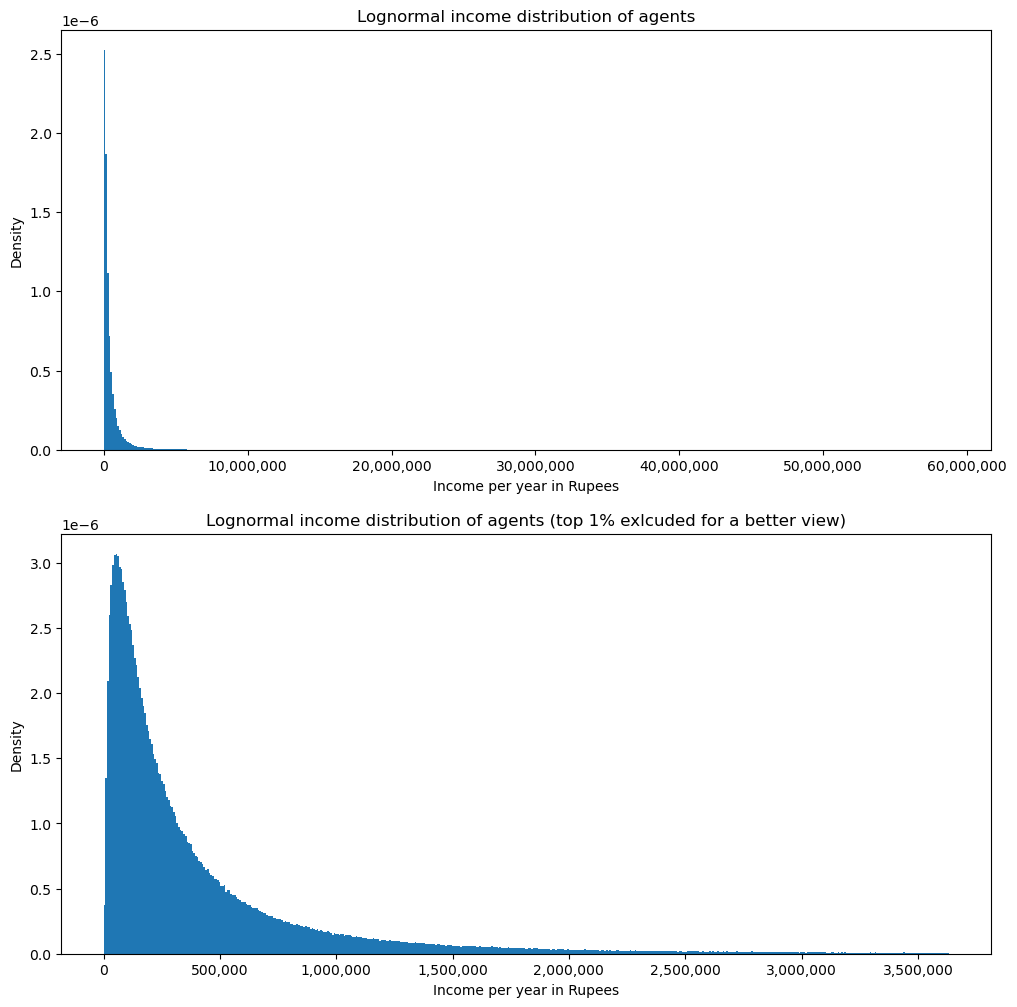

In [9]:
# plot the lognormal agents income distribution
incomes = agents["income"]

# Cut off at, say, the 99.99th percentile for visualization
cutoff = np.percentile(incomes, 99.0)
incomes_percentile = incomes[incomes <= cutoff]

fig, axes = plt.subplots(2,1,figsize = (12,12)) # one plot for actual income distr, one with top 1% cut off
axes[0].hist(incomes, bins = 500, density = True)
axes[0].set_title("Lognormal income distribution of agents")
axes[0].set_xlabel("Income per year in Rupees")
axes[0].set_ylabel("Density")
# format x-axis numbers with commas
axes[0].xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# with top 1% cut off
axes[1].hist(incomes_percentile, bins = 500, density = True)
axes[1].set_title("Lognormal income distribution of agents (top 1% exlcuded for a better view)")
axes[1].set_xlabel("Income per year in Rupees")
axes[1].set_ylabel("Density")
axes[1].xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()